In [80]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
#Import housing and stock data
stock_file = 'Resources/daily_1988to2020_data.csv'
stock_data_1988to2020 = pd.read_csv(stock_file,index_col=0)
stock_data_2018to2020 = stock_data_1988to2020['2018-06-01':'2020-03-19']
stock_data_2018to2020 = stock_data_2018to2020.reset_index()
stock_data_2018to2020 = stock_data_2018to2020.rename(columns={'Date':'ds','Close':'y'})
stock_data_2018to2020

,ds,y
0,2018-06-01,11936.93
1,2018-06-04,12006.70
2,2018-06-05,12051.29
3,2018-06-06,12137.54
4,2018-06-07,12073.21
...,...,...
448,2020-03-13,11796.03
449,2020-03-16,10328.14
450,2020-03-17,10970.48
451,2020-03-18,10379.10


In [93]:
#Use fbprophet to fit data into model
model = Prophet()
model.fit(stock_data_2018to2020)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
#Get forecast with fbprophet
future = model.make_future_dataframe(periods=365,freq='d')
forecast = model.predict(future)

In [95]:
stock_data_2018to2020.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

connect_date = stock_data_2018to2020.index[-2]
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

viz_df = stock_data_2018to2020.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

overflow encountered in exp



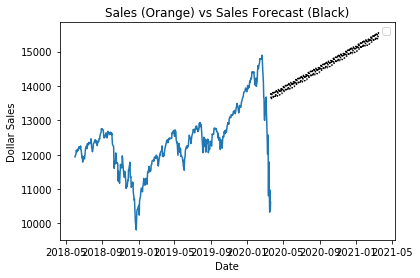

In [96]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.y)
ax1.plot(viz_df.yhat, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
ax1.set_ylabel('Dollar Sales')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend